<font color="blue"><h1 align="left">Usando el dataset Beans(Hugginface)</h1></font>


In [ ]:
!pip install datasets

<font color="blue"><h2 align="left">Importamos el dataset despues de su descarga e importamos las librerias mas relevantes para la elaboraciòn del anàlisis</h2></font>

In [ ]:
from datasets import load_dataset
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from enum import IntEnum
from collections import namedtuple
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Dense, Conv2D,Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
from keras import optimizers
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

<font color="blue"><h2 align="left">Procedimiento por pasos</h2></font>
Paso 1- Los datos: Descarga,particiòn y preprocesado de datos.


In [ ]:
def preprocess_data(data_name, target_size=(150,150)):
    beans_data = load_dataset(data_name)

    def split_dataset(dataset):
        x = dataset['image']
        y = dataset['labels']
        return x, y

    # Función para redimensionar las imágenes
    def resize_images(images, new_size):
        resized_images = [img.resize(new_size) for img in images]
        return [np.array(img) for img in resized_images]

    # Dividir el conjunto de datos en entrenamiento, validación y prueba
    x_train, y_train = split_dataset(beans_data['train'])
    x_val, y_val = split_dataset(beans_data['validation'])
    x_test, y_test = split_dataset(beans_data['test'])

    # Redimensionar las imágenes a la nueva dimensión
    x_train_resized = resize_images(x_train, target_size)
    x_val_resized = resize_images(x_val, target_size)
    x_test_resized = resize_images(x_test, target_size)

    return (
        np.array(x_train_resized),
        np.array(y_train),
        np.array(x_val_resized),
        np.array(y_val),
        np.array(x_test_resized),
        np.array(y_test)
    )


In [ ]:
data_name = 'beans'
target_size = (150,150)
x_train, y_train, x_val, y_val, x_test, y_test = preprocess_data(data_name, target_size=target_size)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

In [ ]:
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (1034, 150, 150, 3)
Forma de x_val: (133, 150, 150, 3)
Forma de x_test: (128, 150, 150, 3)


In [ ]:
x_train

array([[[[ 54,  36,   1],
         [ 53,  31,   0],
         [ 77,  44,  20],
         ...,
         [105,  57,  40],
         [132,  89,  63],
         [117,  74,  54]],

        [[ 48,  32,   1],
         [ 48,  29,   0],
         [ 73,  40,  15],
         ...,
         [ 97,  57,  34],
         [ 99,  59,  42],
         [ 94,  56,  40]],

        [[ 42,  30,   1],
         [ 42,  25,   0],
         [ 66,  36,  13],
         ...,
         [ 94,  62,  40],
         [ 38,   4,   2],
         [ 95,  58,  46]],

        ...,

        [[ 52,  25,  14],
         [ 51,  23,  11],
         [ 47,  19,   7],
         ...,
         [ 89,  63,  38],
         [ 97,  86,  44],
         [143, 153,  85]],

        [[ 58,  28,  19],
         [ 54,  25,  14],
         [ 51,  23,  10],
         ...,
         [110,  91,  49],
         [133, 121,  69],
         [127, 148,  69]],

        [[ 54,  24,  15],
         [ 51,  22,  10],
         [ 47,  21,   6],
         ...,
         [186, 145, 109],
        

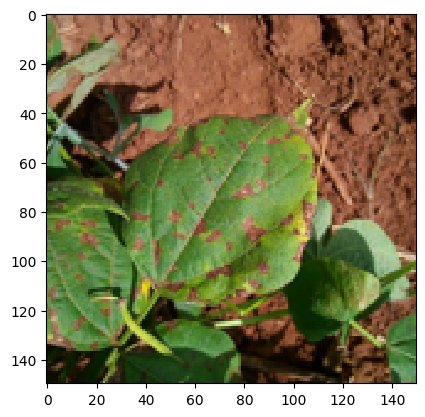

In [ ]:
plt.imshow(x_train[2], cmap= 'gray', interpolation='none')


In [ ]:
# Minimo, Maximo, media de las imagenes
print(x_train.min(), x_train.max(), x_train.mean(), x_train.std())


0 255 111.8061301669174 56.47556722072988


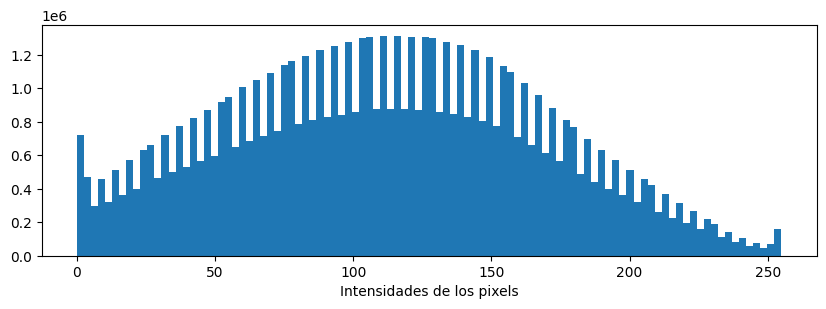

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(x_train.reshape(-1), bins=100) #, density=True)
plt.xlabel('Intensidades de los pixels', fontsize=10);

In [ ]:
# Normalización de los datos
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
x_train.shape

(1034, 150, 150, 3)

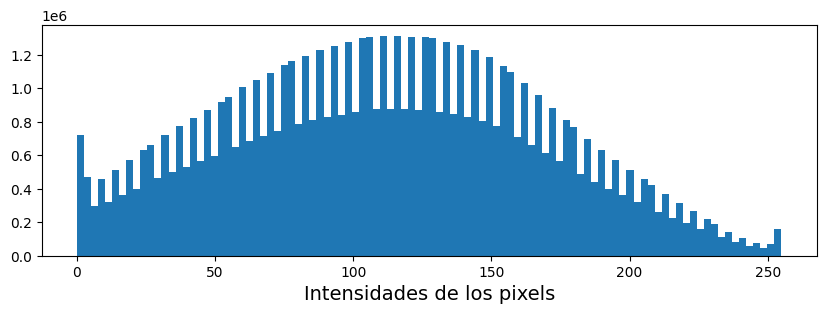

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(x_train.reshape(-1), bins=100) #, density=True)
plt.xlabel('Intensidades de los pixels', fontsize=14);

In [ ]:
# Inspecciòn de las clases
unicos, counts = np.unique(y_test, return_counts= True)
print(unicos)
print(counts)

[0 1 2]
[43 43 42]


In [ ]:
#Preprocesado de las clases
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
np.shape(x_train)

(1034, 150, 150, 3)


<font color="blue"><h2 align="left">Definimos el modelo con el menor número de parámetros.</h2></font>

In [ ]:
#crear modelo con el menor número de parámetros.
model_1 = Sequential()

model_1.add(Conv2D(4, kernel_size=5, activation='relu', input_shape=(150,150,3)))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(4, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(6, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(3, activation='softmax'))

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 6)         222       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 6)         0

In [ ]:
#Paso 2-Función de coste:"categorical_crossentropy"
model_1.compile(metrics=["categorical_accuracy"],
              optimizer= optimizers.Adam(0.001),
              loss="categorical_crossentropy")

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [ ]:
# Entrenamos
hist = model_1.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 6s 220ms/step - loss: 1.0537 - categorical_accuracy: 0.4232 - val_loss: 1.7471 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 45ms/step - loss: 1.0211 - categorical_accuracy: 0.4220 - val_loss: 1.9767 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 44ms/step - loss: 1.0094 - categorical_accuracy: 0.4994 - val_loss: 1.8352 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 45ms/step - loss: 0.9965 - categorical_accuracy: 0.5623 - val_loss: 1.7126 - val_categorical_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 42ms/step - loss: 0.9794 - categorical_accuracy: 0.5623 - val_loss: 1.8258 - val_categorical_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 41ms/step - loss: 0.9598 - categorical_accuracy: 0.5683 - val_loss: 1.8278 - val_categorical_accuracy: 0.

In [ ]:
# Entrenamiento usando Callbacks: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0001)

In [ ]:
hist = model_1.fit(x_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split=0.2,
          callbacks=[reduce_lr])


Epoch 1/100
7/7 [==============================] - 1s 112ms/step - loss: 0.4977 - categorical_accuracy: 0.7896 - val_loss: 0.9096 - val_categorical_accuracy: 0.7005 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 48ms/step - loss: 0.5040 - categorical_accuracy: 0.7908 - val_loss: 0.8409 - val_categorical_accuracy: 0.7150 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 43ms/step - loss: 0.4939 - categorical_accuracy: 0.7981 - val_loss: 1.0620 - val_categorical_accuracy: 0.6329 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 1s 83ms/step - loss: 0.5068 - categorical_accuracy: 0.7727 - val_loss: 0.6709 - val_categorical_accuracy: 0.7585 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 43ms/step - loss: 0.4969 - categorical_accuracy: 0.7836 - val_loss: 0.9278 - val_categorical_accuracy: 0.6812 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 44ms/step - loss: 0.4959 - categorical_accuracy: 0.7908 - va

In [ ]:
model_2 = Sequential()


model_2.add(Conv2D(4, kernel_size=5, activation='relu', input_shape=(150,150,3)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(6, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(2))
model_2.add(Conv2D(10, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(2))
model_2.add(Conv2D(16, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(2))
model_2.add(Flatten())
model_2.add(Dense(16, activation='relu', kernel_regularizer = regularizers.L1(0.2)))
model_2.add(Dense(3, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 146, 146, 4)       304       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 73, 73, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 71, 71, 6)         222       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 35, 35, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 33, 33, 10)        550       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 10)       

In [ ]:
#Paso 2-Función de coste:"categorical_crossentropy"
model_2.compile(metrics=["categorical_accuracy"],
              optimizer= optimizers.Adam(0.001),
              loss="categorical_crossentropy")

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [ ]:
# Entrenamos
hist = model_2.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/200
7/7 [==============================] - 3s 109ms/step - loss: 102.7102 - categorical_accuracy: 0.3978 - val_loss: 92.8783 - val_categorical_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 50ms/step - loss: 86.6218 - categorical_accuracy: 0.4256 - val_loss: 77.9333 - val_categorical_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 45ms/step - loss: 72.0410 - categorical_accuracy: 0.4305 - val_loss: 64.5799 - val_categorical_accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 44ms/step - loss: 58.9208 - categorical_accuracy: 0.4522 - val_loss: 52.4172 - val_categorical_accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 43ms/step - loss: 47.1368 - categorical_accuracy: 0.4522 - val_loss: 41.2609 - val_categorical_accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 43ms/step - loss: 36.6715 - categorical_accuracy: 0.4655 - val_loss: 31.6205 - val_categorical

In [ ]:
# Entrenamiento usando Callbacks: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0001)

In [ ]:
hist = model_2.fit(x_train, y_train,
          epochs=200,
          batch_size=128,
          validation_split=0.2,
          callbacks=[reduce_lr])


Epoch 1/200
7/7 [==============================] - 1s 86ms/step - loss: 1.3210 - categorical_accuracy: 0.4921 - val_loss: 2.0228 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/200
7/7 [==============================] - 0s 48ms/step - loss: 1.3425 - categorical_accuracy: 0.5018 - val_loss: 2.0798 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/200
7/7 [==============================] - 0s 44ms/step - loss: 1.3648 - categorical_accuracy: 0.4933 - val_loss: 1.9693 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/200
7/7 [==============================] - 0s 43ms/step - loss: 1.3386 - categorical_accuracy: 0.5175 - val_loss: 1.8095 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/200
7/7 [==============================] - 0s 42ms/step - loss: 1.3338 - categorical_accuracy: 0.5091 - val_loss: 1.9019 - val_categorical_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/200
7/7 [==============================] - 0s 45ms/step - loss: 1.3355 - categorical_ac

<font color="blue"><h2 align="left">Definimos el modelo con mas parámetros que número de datos.</h2></font>

In [ ]:
#crear modelo con  màs parametros que datos
model_3= Sequential()

model_3.add(Conv2D(10, kernel_size=5, activation='relu',input_shape=(150,150,3),
                activity_regularizer=regularizers.l1(0.1)))
model_3.add(MaxPooling2D(2))
model_3.add(Dropout(rate=0.1))

model_3.add(Conv2D(16, kernel_size=3, activation='relu'))
model_3.add(MaxPooling2D(2))
model_3.add(Dropout(rate=0.1))

model_3.add(Conv2D(32, kernel_size=3, activation='relu'))
model_3.add(MaxPooling2D(2))
model_3.add(Dropout(rate=0.1))

model_3.add(Conv2D(32, kernel_size=3, activation='relu'))
model_3.add(MaxPooling2D(2))
model_3.add(Dropout(rate=0.1))
model_3.add(Flatten())
model_3.add(Dropout(rate=0.2))
model_3.add(Dense(units=100, activation="relu", kernel_regularizer=regularizers.L2(0.2)))
model_3.add(Dense(units=3, activation="softmax"))

model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 146, 146, 10)      760       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 73, 73, 10)        0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 73, 73, 10)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 71, 71, 16)        1456      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 35, 35, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 35, 35, 16)       

<font color="blue"><h2 align="left">Paso 2-Función de coste</h2></font>


In [ ]:
model_3.compile(metrics=["categorical_accuracy"],
              optimizer= optimizers.Adam(0.01),
              loss="categorical_crossentropy")

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [ ]:
# Entrenamos
hist = model_3.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/200
7/7 [==============================] - 3s 136ms/step - loss: 13.9161 - categorical_accuracy: 0.3930 - val_loss: 4.9238 - val_categorical_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 65ms/step - loss: 5.5695 - categorical_accuracy: 0.4148 - val_loss: 4.6633 - val_categorical_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 63ms/step - loss: 2.5285 - categorical_accuracy: 0.4027 - val_loss: 2.7974 - val_categorical_accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 66ms/step - loss: 2.0122 - categorical_accuracy: 0.4389 - val_loss: 2.5795 - val_categorical_accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 62ms/step - loss: 1.3855 - categorical_accuracy: 0.4946 - val_loss: 1.8322 - val_categorical_accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 64ms/step - loss: 1.2594 - categorical_accuracy: 0.5248 - val_loss: 1.9993 - val_categorical_accuracy: 0

In [ ]:
# Entrenamiento usando Callbacks: ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0001)

In [ ]:
hist = model_2.fit(x_train, y_train,
          epochs=100,
          batch_size=128,
          validation_split=0.2,
          callbacks=[reduce_lr])

Epoch 1/100
7/7 [==============================] - 1s 99ms/step - loss: 0.8997 - categorical_accuracy: 0.6010 - val_loss: 1.3640 - val_categorical_accuracy: 0.4155 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 0s 72ms/step - loss: 0.8966 - categorical_accuracy: 0.6070 - val_loss: 1.5156 - val_categorical_accuracy: 0.3092 - lr: 1.0000e-04
Epoch 3/100
7/7 [==============================] - 0s 66ms/step - loss: 0.9110 - categorical_accuracy: 0.6215 - val_loss: 1.4669 - val_categorical_accuracy: 0.2850 - lr: 1.0000e-04
Epoch 4/100
7/7 [==============================] - 0s 74ms/step - loss: 0.9170 - categorical_accuracy: 0.5877 - val_loss: 1.3766 - val_categorical_accuracy: 0.3913 - lr: 1.0000e-04
Epoch 5/100
7/7 [==============================] - 0s 59ms/step - loss: 0.9167 - categorical_accuracy: 0.6143 - val_loss: 1.3346 - val_categorical_accuracy: 0.3720 - lr: 1.0000e-04
Epoch 6/100
7/7 [==============================] - 0s 44ms/step - loss: 0.8950 - categorical_ac

<font color="blue"><h2 align="left">Evaluamos en datos de test</h2></font>

In [ ]:
score = model_1.evaluate(x_test,y_test)
score

4/4 [==============================] - 0s 9ms/step - loss: 0.6857 - categorical_accuracy: 0.7109


[0.6856852173805237, 0.7109375]

In [ ]:
score = model_2.evaluate(x_test,y_test)
score

4/4 [==============================] - 0s 8ms/step - loss: 0.9349 - categorical_accuracy: 0.6094


[0.9349237680435181, 0.609375]

In [ ]:
score = model_3.evaluate(x_test,y_test)
score

4/4 [==============================] - 0s 7ms/step - loss: 1.0610 - categorical_accuracy: 0.5234


[1.0609833002090454, 0.5234375]

<font color="blue"><h2 align="left">Ploteamos la evolución de Loss, Val_loss y Accuracy</h2></font>


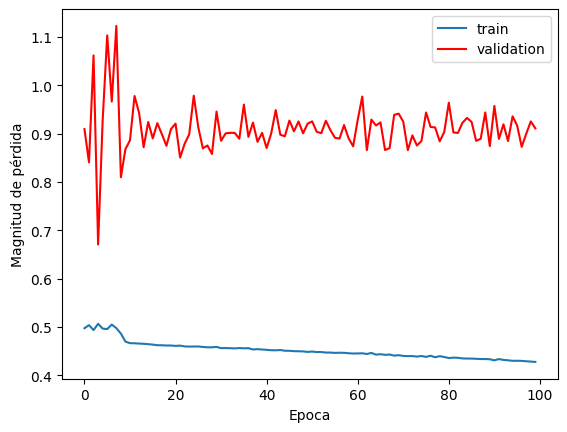

In [ ]:
#Evol del Loss en modelo_1 con el menor número de parámetros
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Magnitud de pérdida")
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()

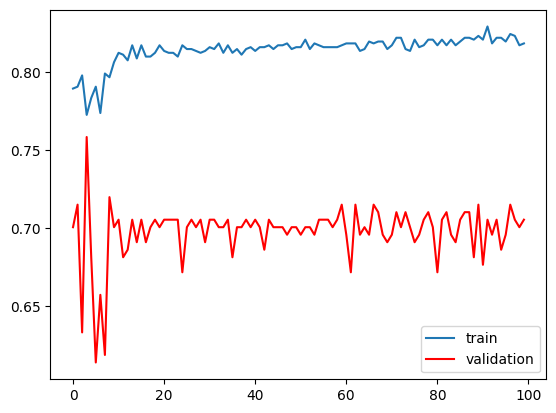

In [ ]:
# Evolucion en accuracy modelo1

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['categorical_accuracy'],label='train')
plt.plot(hist.history['val_categorical_accuracy'],'r',label='validation')
plt.legend()


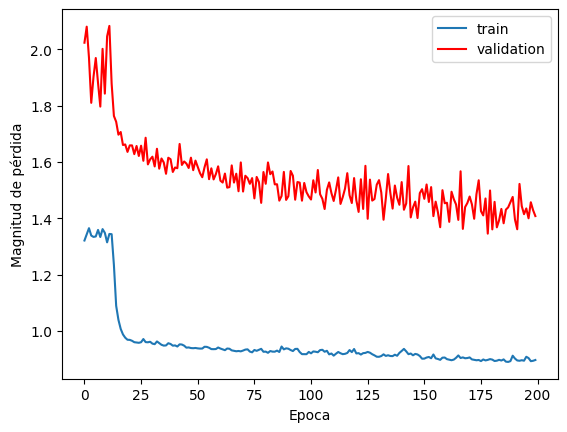

In [ ]:
#Evol del Loss en modelo_2 con el mayor número de parámetros
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Magnitud de pérdida")
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()

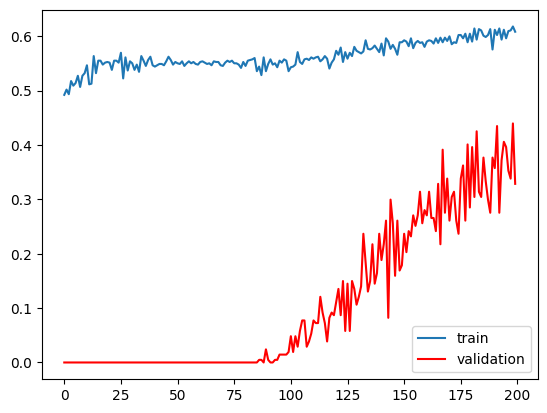

In [ ]:
# #Evol del Loss en modelo_2 con el mayor número de parámetros

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['categorical_accuracy'],label='train')
plt.plot(hist.history['val_categorical_accuracy'],'r',label='validation')
plt.legend()


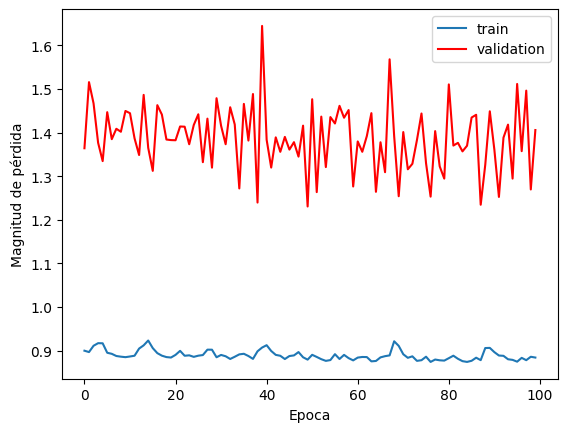

In [ ]:
#Evol del Loss en modelo_3 con el mayor número de parámetros
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Magnitud de pérdida")
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()

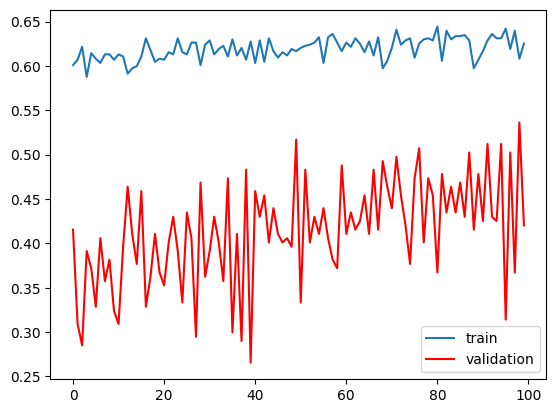

In [ ]:
# #Evol del Loss en modelo_2 con el mayor número de parámetros

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['categorical_accuracy'],label='train')
plt.plot(hist.history['val_categorical_accuracy'],'r',label='validation')
plt.legend()


<font color="blue"><h2 align="left">Conclusiones del anàlisis en un documento pdf adjunto.</h2></font>